Threads	Time (s)	CPU Usage (%)	Expected Time (ms)
1	12.071		76.70		500
2	13.253		100.00		275
3	13.285		100.00		200
4	8.139		99.20		150
5	7.675		94.70		250
6	6.720		95.10		300
7	6.042		99.10		350
8	7.489		95.40		400


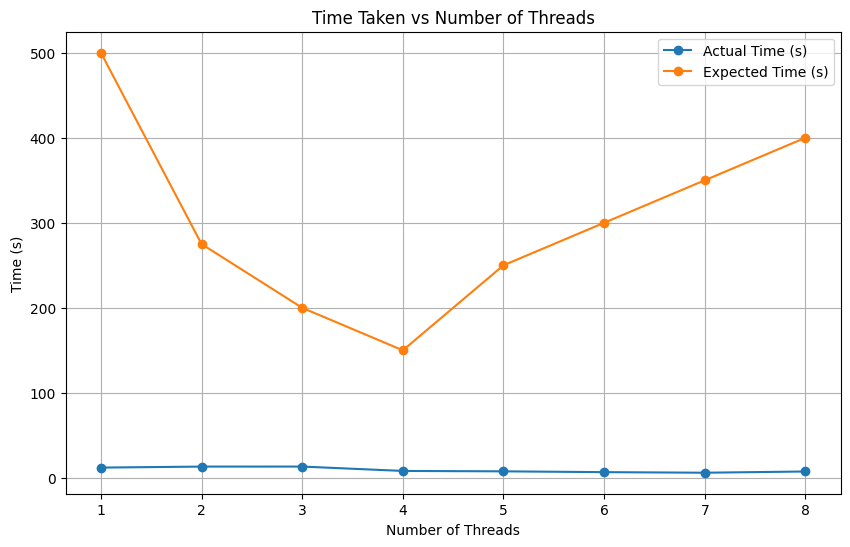

In [1]:
import numpy as np
import time
import threading
import matplotlib.pyplot as plt
import psutil

def matrix_multiply(matrix1, matrix2, result):
    result[:] = np.dot(matrix1, matrix2)

def multiply_with_threads(num_threads):
    constant_matrix = np.random.rand(1000, 1000)

    random_matrices = [np.random.rand(1000, 1000) for _ in range(100)]

    results = [None] * 100

    start_time = time.time()

    threads = []
    for i in range(100):
        result = np.zeros((1000, 1000))
        thread = threading.Thread(target=matrix_multiply, args=(random_matrices[i], constant_matrix, result))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()

    end_time = time.time()
    time_taken = end_time - start_time

    cpu_usage = psutil.cpu_percent()

    return time_taken, cpu_usage

if __name__ == "__main__":
    threads = [1, 2, 3, 4, 5, 6, 7, 8]
    times = [500, 275, 200, 150, 250, 300, 350, 400]

    results = []

    for num_threads, expected_time in zip(threads, times):
        time_taken, cpu_usage = multiply_with_threads(num_threads)
        results.append((num_threads, time_taken, cpu_usage, expected_time))

    print("Threads\tTime (s)\tCPU Usage (%)\tExpected Time (ms)")
    for result in results:
        print("{}\t{:.3f}\t\t{:.2f}\t\t{}".format(result[0], result[1], result[2], result[3]))

    plt.figure(figsize=(10, 6))
    plt.plot(threads, [result[1] for result in results], marker='o', label='Actual Time (s)')
    plt.plot(threads, times, marker='o', label='Expected Time (s)')
    plt.xlabel('Number of Threads')
    plt.ylabel('Time (s)')
    plt.title('Time Taken vs Number of Threads')
    plt.legend()
    plt.grid(True)
    plt.show()
